In [1]:
import seaborn as sns #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from  matplotlib.dates import DateFormatter, YearLocator, AutoDateLocator, AutoDateFormatter
import random 
from scipy import stats    
import datetime

In [4]:
df = pd.read_excel(r'D:\Documents\Recursos_hidricos\TESIS\XLS\Analisis_v2_19_07_02\movimientos verticales.xlsx',sheet_name='MV_Kp_21_04')
error = pd.read_excel(r'D:\Documents\Recursos_hidricos\TESIS\XLS\Analisis_v2_19_07_02\movimientos verticales.xlsx',sheet_name='error_21_04')
media = df.groupby(df.Zone).mean()
media["Zones"] = media.index.values
mediana = df.groupby(df.Zone).median()
mediana["Zones"] = mediana.index.values
df.head()

,Zone,Group,E,W,Change,Rate,Orientation,Orientation code,Observations
0,1,29,271.000000,530.000000,259.000000,18.500000,W,0,NaN
1,1,29,432.000000,667.000000,235.000000,16.785714,W,0,NaN
2,2,2,490.000000,473.000000,17.000000,1.214286,E,1,Falla Estero Francisco
3,2,3,387.653267,283.582284,104.070983,7.433642,E,1,Falla Estero Francisco
4,2,3,450.744476,459.416169,8.671693,0.619407,W,0,Falla Estero Francisco


<Figure size 504x288 with 0 Axes>

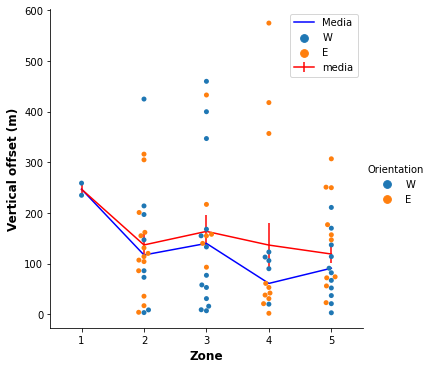

In [5]:
plt.figure(figsize=(7, 4))
g = sns.catplot(x="Zone", y="Change", kind="swarm", hue = "Orientation", data = df)
#g = plt.plot((media.Zones - 1), media.Change, color = "r", label = "Media")
g = plt.errorbar((media.Zones - 1), media.Change, yerr=error.Error, label='media', color = "r")
g = plt.plot((mediana.Zones - 1), mediana.Change, color = "b", label = "Media")
plt.ylabel("Vertical offset (m)",fontweight="bold",fontsize=12)
plt.xlabel("Zone",fontweight="bold",fontsize=12)
plt.legend()

<ipython-input-15-41eb4020961b>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("VM_Zones.png",DPI=300)


<Figure size 504x504 with 0 Axes>

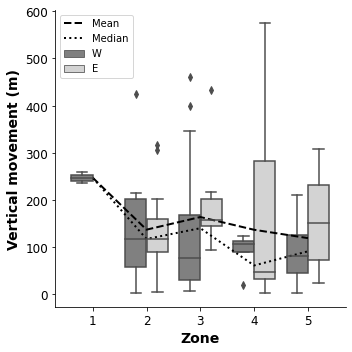

In [15]:
plt.figure(figsize=(7, 7))

g = sns.catplot(x="Zone", y="Change", kind="box", 
                hue = "Orientation", data = df,legend=False,
                palette=["gray", "lightgray"])
#g = plt.fill_between((media.Zones - 1),media.Change,color="aliceblue")
g = plt.plot((media.Zones - 1), media.Change, color = "k", label = "Mean", linestyle='--', linewidth=2)
g = plt.plot((mediana.Zones - 1), mediana.Change, color = "k", linestyle='dotted', linewidth=2,label = "Median")
plt.ylabel("Vertical movement (m)",fontweight="bold",fontsize=14)
plt.xlabel("Zone",fontweight="bold",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig("VM_Zones.png",DPI=300)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-7-9d6cdb5f96e5>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("histogram.png",DPI=300, bbox_inches='tight')


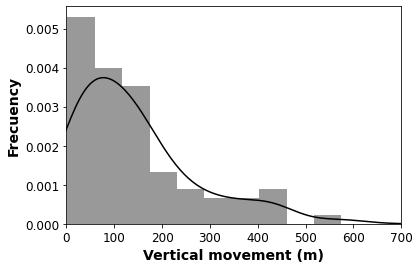

In [7]:
#Histogram
sns.distplot(df.Change, color="k");
plt.ylabel("Frecuency",fontweight="bold",fontsize=14)
plt.xlabel("Vertical movement (m)",fontweight="bold",fontsize=14)
plt.xlim([0,700])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
m= df.Change.describe(include=[np.number])
plt.savefig("histogram.png",DPI=300, bbox_inches='tight')

In [8]:
m.round(1)


count     79.0
mean     141.3
std      125.2
min        2.0
25%       52.5
50%      113.0
75%      187.0
max      575.0
Name: Change, dtype: float64

<ipython-input-27-990251dfa285>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("count.png",DPI=300)


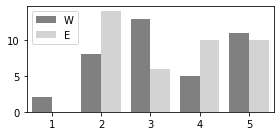

In [27]:
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(x="Zone", 
                hue = "Orientation", data = df,
                palette=["gray", "lightgray"],
           ax=ax);
ax.set( ylabel='', xlabel='')
ax.legend()
plt.tight_layout()
fig.savefig("count.png",DPI=300)